# Iteration 1
This notebook demonstrates the `train` and `test` functions for the dataset. The focus is to setup the basic model to have a good accuracy.

In [ ]:
#pip install albumentations==1.3.1 opencv-python

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from py_src.models.model_5 import Net
from py_src.train_model4 import train, train_losses, train_acc
from py_src.train_model4 import AlbumentationsWrapper
from py_src.train_model4 import train_aug, test_aug
from py_src.test import test, test_losses, test_acc
from torchsummary import summary
from py_src.train_model4 import train_transforms, test_transforms

In [ ]:
# Data transforms (use helpers from train.py)


# Set augment=True to enable small augmentations during training
train_transforms = train_transforms(augment=False)
test_transforms = test_transforms()

In [ ]:
# Dataset and DataLoader


train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=None)
test_dataset = datasets.CIFAR10('./data', train=False, download=True, transform=None)

train_ds = AlbumentationsWrapper(train_dataset, train_aug)
test_ds  = AlbumentationsWrapper(test_dataset,  test_aug)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True,num_workers=0)
test_loader = DataLoader(test_ds, batch_size=64, shuffle=False,num_workers=0)


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# CIFAR-10 stats used in your Normalize
MEAN = (0.4914, 0.4822, 0.4465)
STD  = (0.2470, 0.2435, 0.2616)

def show_batch(tensors, labels=None, n=20):
    """
    tensors: (B, C, H, W) normalized by MEAN/STD
    labels:  (B,) optional
    """
    if isinstance(tensors, np.ndarray):
            tensors = torch.from_numpy(tensors)
    if tensors.dim() == 3:
        tensors = tensors.unsqueeze(0)
        if labels is not None and not isinstance(labels, (list, tuple)):
            labels = [labels]
    b = min(n, tensors.size(0))
    mean = torch.tensor(MEAN, device=tensors.device).view(1, 3, 1, 1)
    std  = torch.tensor(STD,  device=tensors.device).view(1, 3, 1, 1)

    # de-normalize to [0,1] range
    imgs = tensors * std + mean
    imgs = imgs.clamp(0, 1)  # safe for display

    cols = 10
    rows = (b + cols - 1) // cols
    plt.figure(figsize=(1.6*cols, 1.6*rows))
    for i in range(b):
        plt.subplot(rows, cols, i+1)
        img = imgs[i].permute(1, 2, 0).detach().cpu().numpy()  # HWC
        plt.imshow(img)
        if labels is not None:
            plt.title(int(labels[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()#Let us visualize few sample images

import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
print(batch_data.shape)  # Should be (batch_size, 3, 32, 32)
#show_batch(batch_data, batch_label, n=20)

#@show_batch(batch_data, batch_label, n=20)
#fig = plt.figure(figsize=(15, 10))  # Increased figure size




torch.Size([64, 3, 32, 32])


In [ ]:
from torch.optim.lr_scheduler import StepLR
# Model, device, optimizer
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 16, 16]           4,608
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
           Dropout-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,432
      BatchNorm2d-10           [-1, 64, 16, 16]             128
             ReLU-11           [-1, 64, 16, 16]               0
          Dropout-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]           4,096
      BatchNorm2d-14           [-1, 64,

In [ ]:
# Training and Testing Loop
EPOCHS = 50
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for epoch in range(EPOCHS):
    print(f"EPOCH: {epoch}")
    train(model, device, train_loader, optimizer, epoch)z
    test(model, device, test_loader)
    scheduler.step()


EPOCH: 0


Loss=1.428773045539856 Batch_id=781 Accuracy=37.60: 100%|██████████| 782/782 [00:35<00:00, 21.75it/s]



Test set: Average loss: 0.0258, Accuracy: 4150/10000 (41.50%)

EPOCH: 1


Loss=1.5532183647155762 Batch_id=781 Accuracy=53.59: 100%|██████████| 782/782 [00:34<00:00, 22.49it/s]



Test set: Average loss: 0.0236, Accuracy: 4839/10000 (48.39%)

EPOCH: 2


Loss=1.4222559928894043 Batch_id=781 Accuracy=60.07: 100%|██████████| 782/782 [00:34<00:00, 22.65it/s]



Test set: Average loss: 0.0171, Accuracy: 6217/10000 (62.17%)

EPOCH: 3


Loss=1.2148993015289307 Batch_id=781 Accuracy=63.91: 100%|██████████| 782/782 [00:34<00:00, 22.80it/s]



Test set: Average loss: 0.0201, Accuracy: 5709/10000 (57.09%)

EPOCH: 4


Loss=0.8430016040802002 Batch_id=781 Accuracy=66.59: 100%|██████████| 782/782 [00:35<00:00, 22.33it/s]



Test set: Average loss: 0.0213, Accuracy: 5750/10000 (57.50%)

EPOCH: 5


Loss=1.4576164484024048 Batch_id=781 Accuracy=67.58: 100%|██████████| 782/782 [00:34<00:00, 22.66it/s]



Test set: Average loss: 0.0172, Accuracy: 6317/10000 (63.17%)

EPOCH: 6


Loss=0.8033480644226074 Batch_id=781 Accuracy=69.02: 100%|██████████| 782/782 [00:34<00:00, 22.62it/s]



Test set: Average loss: 0.0143, Accuracy: 6934/10000 (69.34%)

EPOCH: 7


Loss=0.7574529051780701 Batch_id=781 Accuracy=69.43: 100%|██████████| 782/782 [00:34<00:00, 22.65it/s]



Test set: Average loss: 0.0123, Accuracy: 7280/10000 (72.80%)

EPOCH: 8


Loss=0.9425679445266724 Batch_id=781 Accuracy=70.45: 100%|██████████| 782/782 [00:35<00:00, 22.23it/s]



Test set: Average loss: 0.0150, Accuracy: 6719/10000 (67.19%)

EPOCH: 9


Loss=1.0173283815383911 Batch_id=781 Accuracy=70.53: 100%|██████████| 782/782 [00:34<00:00, 22.41it/s]



Test set: Average loss: 0.0131, Accuracy: 7131/10000 (71.31%)

EPOCH: 10


Loss=0.6078682541847229 Batch_id=781 Accuracy=78.74: 100%|██████████| 782/782 [00:34<00:00, 22.42it/s]



Test set: Average loss: 0.0082, Accuracy: 8200/10000 (82.00%)

EPOCH: 11


Loss=0.4997500777244568 Batch_id=781 Accuracy=80.55: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]



Test set: Average loss: 0.0078, Accuracy: 8280/10000 (82.80%)

EPOCH: 12


Loss=0.3927803933620453 Batch_id=781 Accuracy=81.18: 100%|██████████| 782/782 [00:35<00:00, 22.19it/s]



Test set: Average loss: 0.0077, Accuracy: 8297/10000 (82.97%)

EPOCH: 13


Loss=0.7410441637039185 Batch_id=781 Accuracy=81.95: 100%|██████████| 782/782 [00:34<00:00, 22.44it/s]



Test set: Average loss: 0.0076, Accuracy: 8357/10000 (83.57%)

EPOCH: 14


Loss=0.5746945142745972 Batch_id=781 Accuracy=82.29: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]



Test set: Average loss: 0.0075, Accuracy: 8331/10000 (83.31%)

EPOCH: 15


Loss=1.1353321075439453 Batch_id=781 Accuracy=82.64: 100%|██████████| 782/782 [00:35<00:00, 22.25it/s]



Test set: Average loss: 0.0074, Accuracy: 8417/10000 (84.17%)

EPOCH: 16


Loss=0.57362961769104 Batch_id=781 Accuracy=83.00: 100%|██████████| 782/782 [00:36<00:00, 21.49it/s]



Test set: Average loss: 0.0073, Accuracy: 8430/10000 (84.30%)

EPOCH: 17


Loss=0.4464775025844574 Batch_id=781 Accuracy=83.22: 100%|██████████| 782/782 [00:36<00:00, 21.72it/s]



Test set: Average loss: 0.0075, Accuracy: 8352/10000 (83.52%)

EPOCH: 18


Loss=0.6928497552871704 Batch_id=781 Accuracy=83.46: 100%|██████████| 782/782 [00:35<00:00, 22.10it/s]



Test set: Average loss: 0.0077, Accuracy: 8339/10000 (83.39%)

EPOCH: 19


Loss=0.9828096032142639 Batch_id=781 Accuracy=83.48: 100%|██████████| 782/782 [00:36<00:00, 21.71it/s]



Test set: Average loss: 0.0074, Accuracy: 8405/10000 (84.05%)

EPOCH: 20


Loss=0.3998897969722748 Batch_id=781 Accuracy=85.64: 100%|██████████| 782/782 [00:36<00:00, 21.38it/s]



Test set: Average loss: 0.0063, Accuracy: 8602/10000 (86.02%)

EPOCH: 21


Loss=0.5133297443389893 Batch_id=781 Accuracy=86.42: 100%|██████████| 782/782 [00:35<00:00, 22.29it/s]



Test set: Average loss: 0.0061, Accuracy: 8667/10000 (86.67%)

EPOCH: 22


Loss=0.3621320128440857 Batch_id=781 Accuracy=86.51: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]



Test set: Average loss: 0.0060, Accuracy: 8684/10000 (86.84%)

EPOCH: 23


Loss=0.6998043060302734 Batch_id=781 Accuracy=86.71: 100%|██████████| 782/782 [00:35<00:00, 21.79it/s]



Test set: Average loss: 0.0061, Accuracy: 8680/10000 (86.80%)

EPOCH: 24


Loss=0.734221339225769 Batch_id=781 Accuracy=86.89: 100%|██████████| 782/782 [00:35<00:00, 22.34it/s]



Test set: Average loss: 0.0060, Accuracy: 8677/10000 (86.77%)

EPOCH: 25


Loss=0.461467981338501 Batch_id=781 Accuracy=86.89: 100%|██████████| 782/782 [00:35<00:00, 22.34it/s]



Test set: Average loss: 0.0059, Accuracy: 8708/10000 (87.08%)

EPOCH: 26


Loss=0.4738641381263733 Batch_id=781 Accuracy=87.18: 100%|██████████| 782/782 [00:35<00:00, 22.15it/s]



Test set: Average loss: 0.0059, Accuracy: 8722/10000 (87.22%)

EPOCH: 27


Loss=0.3975053131580353 Batch_id=781 Accuracy=86.88: 100%|██████████| 782/782 [00:35<00:00, 21.82it/s]



Test set: Average loss: 0.0059, Accuracy: 8717/10000 (87.17%)

EPOCH: 28


Loss=0.2989272475242615 Batch_id=781 Accuracy=87.20: 100%|██████████| 782/782 [00:35<00:00, 22.22it/s]



Test set: Average loss: 0.0058, Accuracy: 8728/10000 (87.28%)

EPOCH: 29


Loss=0.23510470986366272 Batch_id=781 Accuracy=87.32: 100%|██████████| 782/782 [00:34<00:00, 22.43it/s]



Test set: Average loss: 0.0058, Accuracy: 8732/10000 (87.32%)

EPOCH: 30


Loss=0.25185275077819824 Batch_id=781 Accuracy=87.46: 100%|██████████| 782/782 [00:34<00:00, 22.44it/s]



Test set: Average loss: 0.0057, Accuracy: 8741/10000 (87.41%)

EPOCH: 31


Loss=0.5943067073822021 Batch_id=781 Accuracy=87.59: 100%|██████████| 782/782 [00:35<00:00, 22.06it/s]



Test set: Average loss: 0.0058, Accuracy: 8725/10000 (87.25%)

EPOCH: 32


Loss=0.05432559922337532 Batch_id=781 Accuracy=87.80: 100%|██████████| 782/782 [00:34<00:00, 22.52it/s]



Test set: Average loss: 0.0057, Accuracy: 8743/10000 (87.43%)

EPOCH: 33


Loss=0.5301576852798462 Batch_id=781 Accuracy=87.74: 100%|██████████| 782/782 [00:35<00:00, 22.26it/s]



Test set: Average loss: 0.0058, Accuracy: 8724/10000 (87.24%)

EPOCH: 34


Loss=0.605631947517395 Batch_id=781 Accuracy=87.92: 100%|██████████| 782/782 [00:35<00:00, 22.28it/s]



Test set: Average loss: 0.0057, Accuracy: 8740/10000 (87.40%)

EPOCH: 35


Loss=0.33036404848098755 Batch_id=781 Accuracy=87.73: 100%|██████████| 782/782 [00:35<00:00, 22.12it/s]



Test set: Average loss: 0.0058, Accuracy: 8716/10000 (87.16%)

EPOCH: 36


Loss=0.3431711792945862 Batch_id=781 Accuracy=87.72: 100%|██████████| 782/782 [00:34<00:00, 22.46it/s]



Test set: Average loss: 0.0058, Accuracy: 8723/10000 (87.23%)

EPOCH: 37


Loss=0.33136647939682007 Batch_id=781 Accuracy=87.80: 100%|██████████| 782/782 [00:35<00:00, 22.33it/s]



Test set: Average loss: 0.0057, Accuracy: 8756/10000 (87.56%)

EPOCH: 38


Loss=0.7047814130783081 Batch_id=781 Accuracy=87.93: 100%|██████████| 782/782 [00:35<00:00, 21.87it/s]



Test set: Average loss: 0.0057, Accuracy: 8751/10000 (87.51%)

EPOCH: 39


Loss=0.6061822175979614 Batch_id=781 Accuracy=87.86: 100%|██████████| 782/782 [00:35<00:00, 22.27it/s]



Test set: Average loss: 0.0058, Accuracy: 8736/10000 (87.36%)

EPOCH: 40


Loss=0.621471643447876 Batch_id=781 Accuracy=87.92: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]



Test set: Average loss: 0.0058, Accuracy: 8707/10000 (87.07%)

EPOCH: 41


Loss=0.572001039981842 Batch_id=781 Accuracy=87.81: 100%|██████████| 782/782 [00:35<00:00, 22.26it/s]



Test set: Average loss: 0.0057, Accuracy: 8738/10000 (87.38%)

EPOCH: 42


Loss=0.8504981398582458 Batch_id=781 Accuracy=87.97: 100%|██████████| 782/782 [00:36<00:00, 21.44it/s]



Test set: Average loss: 0.0057, Accuracy: 8749/10000 (87.49%)

EPOCH: 43


Loss=0.5374453067779541 Batch_id=781 Accuracy=87.81: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]



Test set: Average loss: 0.0057, Accuracy: 8767/10000 (87.67%)

EPOCH: 44


Loss=0.28891000151634216 Batch_id=781 Accuracy=87.95: 100%|██████████| 782/782 [00:34<00:00, 22.47it/s]



Test set: Average loss: 0.0057, Accuracy: 8750/10000 (87.50%)

EPOCH: 45


Loss=0.9214630126953125 Batch_id=781 Accuracy=87.99: 100%|██████████| 782/782 [00:34<00:00, 22.46it/s]



Test set: Average loss: 0.0058, Accuracy: 8725/10000 (87.25%)

EPOCH: 46


Loss=1.012266993522644 Batch_id=781 Accuracy=87.91: 100%|██████████| 782/782 [00:35<00:00, 21.84it/s]



Test set: Average loss: 0.0058, Accuracy: 8701/10000 (87.01%)

EPOCH: 47


Loss=0.18230527639389038 Batch_id=781 Accuracy=87.65: 100%|██████████| 782/782 [00:35<00:00, 22.16it/s]



Test set: Average loss: 0.0057, Accuracy: 8733/10000 (87.33%)

EPOCH: 48


Loss=0.40316835045814514 Batch_id=781 Accuracy=87.73: 100%|██████████| 782/782 [00:35<00:00, 22.18it/s]



Test set: Average loss: 0.0057, Accuracy: 8734/10000 (87.34%)

EPOCH: 49


Loss=0.8123587369918823 Batch_id=781 Accuracy=88.10: 100%|██████████| 782/782 [00:35<00:00, 22.28it/s]



Test set: Average loss: 0.0058, Accuracy: 8733/10000 (87.33%)



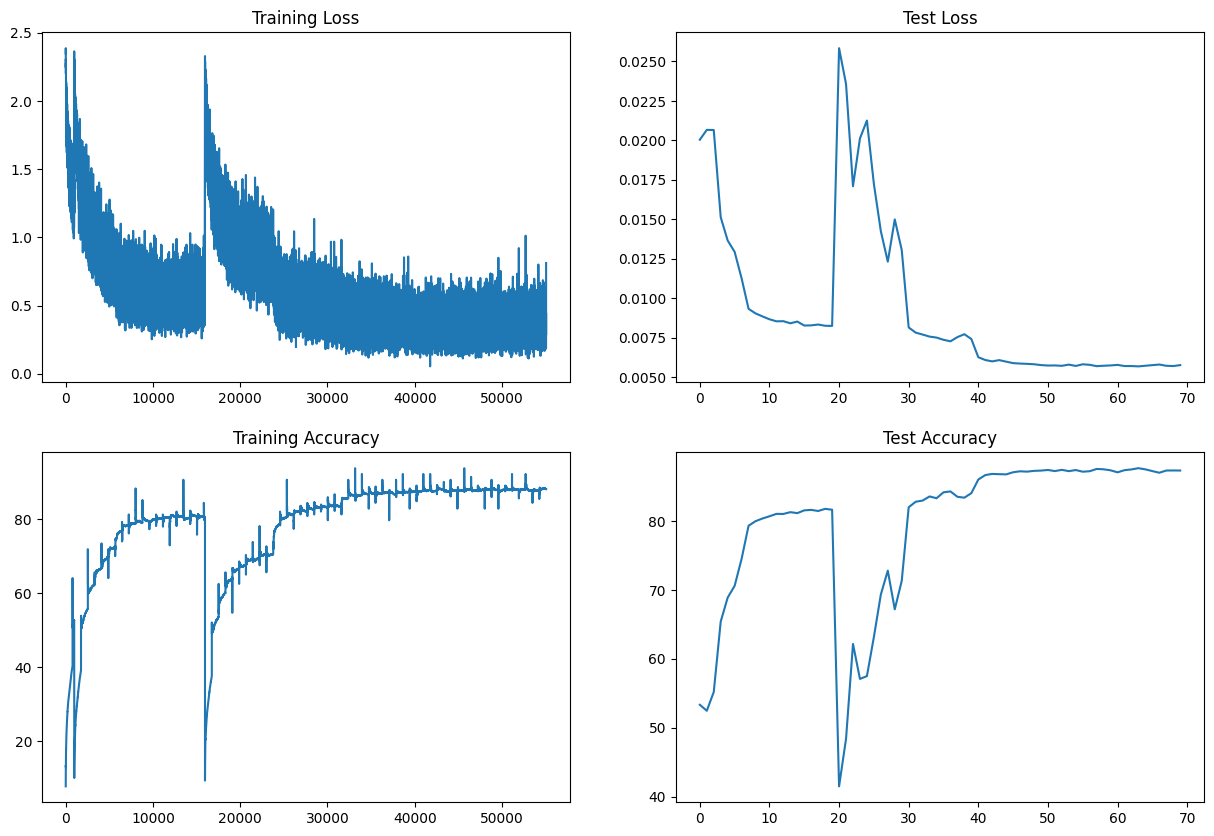

In [ ]:
# Plotting results
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")
plt.show()